In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Housing project train data.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [8]:
#load test dataset
df_test=pd.read_csv('housing test data.csv')

In [9]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [10]:
#check the shape of the both datasets
print(df.shape)
print(df_test.shape)

(1168, 81)
(292, 80)


Observation: there are 1168 rows and 81 columns

# checking for the information of data:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

Observation: we have observe that int64(35), float64(3) and object(43) data types they have. we can also observe that , there are missing values in 18 columns. But, for specific data we go for checking NaN

Observation: there are many object databtypes. we have to handle this by LabelEncoder method

In [6]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
#display all variable names
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# About columns:-


1. Id

Id of each house in Australia
2. MSSubClass

Identifies the type of dwelling involved in the sale.

    20  1-STORY 1946 & NEWER ALL STYLES
    30  1-STORY 1945 & OLDER
    40  1-STORY W/FINISHED ATTIC ALL AGES
    45  1-1/2 STORY - UNFINISHED ALL AGES
    50  1-1/2 STORY FINISHED ALL AGES
    60  2-STORY 1946 & NEWER
    70  2-STORY 1945 & OLDER
    75  2-1/2 STORY ALL AGES
    80  SPLIT OR MULTI-LEVEL
    85  SPLIT FOYER
    90  DUPLEX - ALL STYLES AND AGES
   120  1-STORY PUD (Planned Unit Development) - 1946 & NEWER
   150  1-1/2 STORY PUD - ALL AGES
   160  2-STORY PUD - 1946 & NEWER
   180  PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
   190  2 FAMILY CONVERSION - ALL STYLES AND AGES

3. MSZoning

Identifies the general zoning classification of the sale.

   A    Agriculture
   C    Commercial
   FV   Floating Village Residential
   I    Industrial
   RH   Residential High Density
   RL   Residential Low Density
   RP   Residential Low Density Park 
   RM   Residential Medium Density

4. LotFrontage

Linear feet of street connected to property
5. LotArea

Lot size in square feet
6. Street

Street: Type of road access to property

   Grvl Gravel  
   Pave Paved

7. Alley

Alley: Type of alley access to property

   Grvl Gravel
   Pave Paved
   NA   No alley access

8. LotShape

LotShape: General shape of property

   Reg  Regular 
   IR1  Slightly irregular
   IR2  Moderately Irregular
   IR3  Irregular

9. LandContour

LandContour: Flatness of the property

   Lvl  Near Flat/Level 
   Bnk  Banked - Quick and significant rise from street grade to building
   HLS  Hillside - Significant slope from side to side
   Low  Depression

10. Utilities

Utilities: Type of utilities available

   AllPub   All public Utilities (E,G,W,& S)    
   NoSewr   Electricity, Gas, and Water (Septic Tank)
   NoSeWa   Electricity and Gas Only
   ELO  Electricity only

11. LotConfig

LotConfig: Lot configuration

   Inside   Inside lot
   Corner   Corner lot
   CulDSac  Cul-de-sac
   FR2  Frontage on 2 sides of property
   FR3  Frontage on 3 sides of property

12. LandSlope

LandSlope: Slope of property

   Gtl  Gentle slope
   Mod  Moderate Slope  
   Sev  Severe Slope

13. Neighborhood

Neighborhood: Physical locations within Ames city limits

   Blmngtn  Bloomington Heights
   Blueste  Bluestem
   BrDale   Briardale
   BrkSide  Brookside
   ClearCr  Clear Creek
   CollgCr  College Creek
   Crawfor  Crawford
   Edwards  Edwards
   Gilbert  Gilbert
   IDOTRR   Iowa DOT and Rail Road
   MeadowV  Meadow Village
   Mitchel  Mitchell
   Names    North Ames
   NoRidge  Northridge
   NPkVill  Northpark Villa
   NridgHt  Northridge Heights
   NWAmes   Northwest Ames
   OldTown  Old Town
   SWISU    South & West of Iowa State University
   Sawyer   Sawyer
   SawyerW  Sawyer West
   Somerst  Somerset
   StoneBr  Stone Brook
   Timber   Timberland
   Veenker  Veenker

14. Condition1

Condition1: Proximity to various conditions

   Artery   Adjacent to arterial street
   Feedr    Adjacent to feeder street   
   Norm Normal  
   RRNn Within 200' of North-South Railroad
   RRAn Adjacent to North-South Railroad
   PosN Near positive off-site feature--park, greenbelt, etc.
   PosA Adjacent to postive off-site feature
   RRNe Within 200' of East-West Railroad
   RRAe Adjacent to East-West Railroad

15. Condition2

Condition2: Proximity to various conditions (if more than one is present)

   Artery   Adjacent to arterial street
   Feedr    Adjacent to feeder street   
   Norm Normal  
   RRNn Within 200' of North-South Railroad
   RRAn Adjacent to North-South Railroad
   PosN Near positive off-site feature--park, greenbelt, etc.
   PosA Adjacent to postive off-site feature
   RRNe Within 200' of East-West Railroad
   RRAe Adjacent to East-West Railroad

16. BldgType

BldgType: Type of dwelling

   1Fam Single-family Detached  
   2FmCon   Two-family Conversion; originally built as one-family dwelling
   Duplx    Duplex
   TwnhsE   Townhouse End Unit
   TwnhsI   Townhouse Inside Unit

17. HouseStyle

HouseStyle: Style of dwelling

   1Story   One story
   1.5Fin   One and one-half story: 2nd level finished
   1.5Unf   One and one-half story: 2nd level unfinished
   2Story   Two story
   2.5Fin   Two and one-half story: 2nd level finished
   2.5Unf   Two and one-half story: 2nd level unfinished
   SFoyer   Split Foyer
   SLvl Split Level

18. OverallQual

OverallQual: Rates the overall material and finish of the house

   10   Very Excellent
   9    Excellent
   8    Very Good
   7    Good
   6    Above Average
   5    Average
   4    Below Average
   3    Fair
   2    Poor
   1    Very Poor

19. OverallCond

OverallCond: Rates the overall condition of the house

   10   Very Excellent
   9    Excellent
   8    Very Good
   7    Good
   6    Above Average   
   5    Average
   4    Below Average   
   3    Fair
   2    Poor
   1    Very Poor

20. YearBuilt

YearBuilt: Original construction date
21. YearRemodAdd

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
22. RoofStyle

RoofStyle: Type of roof

   Flat Flat
   Gable    Gable
   Gambrel  Gabrel (Barn)
   Hip  Hip
   Mansard  Mansard
   Shed Shed

23. Roofmatl

RoofMatl: Roof material

   ClyTile  Clay or Tile
   CompShg  Standard (Composite) Shingle
   Membran  Membrane
   Metal    Metal
   Roll Roll
   Tar&Grv  Gravel & Tar
   WdShake  Wood Shakes
   WdShngl  Wood Shingles

24. Exterior1st

Exterior1st: Exterior covering on house

   AsbShng  Asbestos Shingles
   AsphShn  Asphalt Shingles
   BrkComm  Brick Common
   BrkFace  Brick Face
   CBlock   Cinder Block
   CemntBd  Cement Board
   HdBoard  Hard Board
   ImStucc  Imitation Stucco
   MetalSd  Metal Siding
   Other    Other
   Plywood  Plywood
   PreCast  PreCast 
   Stone    Stone
   Stucco   Stucco
   VinylSd  Vinyl Siding
   Wd Sdng  Wood Siding
   WdShing  Wood Shingles

25. Exterior2nd

Exterior2nd: Exterior covering on house (if more than one material)

   AsbShng  Asbestos Shingles
   AsphShn  Asphalt Shingles
   BrkComm  Brick Common
   BrkFace  Brick Face
   CBlock   Cinder Block
   CemntBd  Cement Board
   HdBoard  Hard Board
   ImStucc  Imitation Stucco
   MetalSd  Metal Siding
   Other    Other
   Plywood  Plywood
   PreCast  PreCast
   Stone    Stone
   Stucco   Stucco
   VinylSd  Vinyl Siding
   Wd Sdng  Wood Siding
   WdShing  Wood Shingles

26. MasVnrType

MasVnrType: Masonry veneer type

   BrkCmn   Brick Common
   BrkFace  Brick Face
   CBlock   Cinder Block
   None None
   Stone    Stone

27. MasVnrArea

MasVnrArea: Masonry veneer area in square feet
28. ExterQual

ExterQual: Evaluates the quality of the material on the exterior

   Ex   Excellent
   Gd   Good
   TA   Average/Typical
   Fa   Fair
   Po   Poor

29. ExterCond

ExterCond: Evaluates the present condition of the material on the exterior

   Ex   Excellent
   Gd   Good
   TA   Average/Typical
   Fa   Fair
   Po   Poor

30. Foundation

Foundation: Type of foundation

   BrkTil   Brick & Tile
   CBlock   Cinder Block
   PConc    Poured Contrete 
   Slab Slab
   Stone    Stone
   Wood Wood

31. BsmtQual

BsmtQual: Evaluates the height of the basement

   Ex   Excellent (100+ inches) 
   Gd   Good (90-99 inches)
   TA   Typical (80-89 inches)
   Fa   Fair (70-79 inches)
   Po   Poor (<70 inches
   NA   No Basement

32. BsmtCond

BsmtCond: Evaluates the general condition of the basement

   Ex   Excellent
   Gd   Good
   TA   Typical - slight dampness allowed
   Fa   Fair - dampness or some cracking or settling
   Po   Poor - Severe cracking, settling, or wetness
   NA   No Basement

33. BsmtExposure

BsmtExposure: Refers to walkout or garden level walls

   Gd   Good Exposure
   Av   Average Exposure (split levels or foyers typically score average or above)  
   Mn   Mimimum Exposure
   No   No Exposure
   NA   No Basement

34. BsmtFinType1

BsmtFinType1: Rating of basement finished area

   GLQ  Good Living Quarters
   ALQ  Average Living Quarters
   BLQ  Below Average Living Quarters   
   Rec  Average Rec Room
   LwQ  Low Quality
   Unf  Unfinshed
   NA   No Basement

35. BsmtFinSF1

BsmtFinSF1: Type 1 finished square feet
36. BsmtFinType2

BsmtFinType2: Rating of basement finished area (if multiple types)

   GLQ  Good Living Quarters
   ALQ  Average Living Quarters
   BLQ  Below Average Living Quarters   
   Rec  Average Rec Room
   LwQ  Low Quality
   Unf  Unfinshed
   NA   No Basement

37. BsmtFinSF2

BsmtFinSF2: Type 2 finished square feet
38. BsmtUnfSF

BsmtUnfSF: Unfinished square feet of basement area
39. TotalBsmtSF

TotalBsmtSF: Total square feet of basement area
40. Heating

Heating: Type of heating

   Floor    Floor Furnace
   GasA Gas forced warm air furnace
   GasW Gas hot water or steam heat
   Grav Gravity furnace 
   OthW Hot water or steam heat other than gas
   Wall Wall furnace

41. HeatingQC

HeatingQC: Heating quality and condition

   Ex   Excellent
   Gd   Good
   TA   Average/Typical
   Fa   Fair
   Po   Poor

42. CentralAir

CentralAir: Central air conditioning

   N    No
   Y    Yes

43. Electrical

Electrical: Electrical system

   SBrkr    Standard Circuit Breakers & Romex
   FuseA    Fuse Box over 60 AMP and all Romex wiring (Average) 
   FuseF    60 AMP Fuse Box and mostly Romex wiring (Fair)
   FuseP    60 AMP Fuse Box and mostly knob & tube wiring (poor)
   Mix  Mixed

44. 1stFlrSF

1stFlrSF: First Floor square feet
45. 2ndFlrSF

2ndFlrSF: Second Floor square feet
46. LowQualFinSF

LowQualFinSF: Low quality finished square feet (all floors)
47. GrLivArea

GrLivArea: Above grade (ground) living area square feet
48. BsmtFullBath

BsmtFullBath: Basement full bathrooms
49. BsmtHalfBath

BsmtHalfBath: Basement half bathrooms
50. FullBath

FullBath: Full bathrooms above grade
51. HalfBath

HalfBath: Half baths above grade
52. BedroomAbvGr

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
53. KitchenAbvGr

Kitchen: Kitchens above grade
54. KitchenQual

KitchenQual: Kitchen quality

   Ex   Excellent
   Gd   Good
   TA   Typical/Average
   Fa   Fair
   Po   Poor

55. TotRmsAbvGrd

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
56. Functional

Functional: Home functionality (Assume typical unless deductions are warranted)

   Typ  Typical Functionality
   Min1 Minor Deductions 1
   Min2 Minor Deductions 2
   Mod  Moderate Deductions
   Maj1 Major Deductions 1
   Maj2 Major Deductions 2
   Sev  Severely Damaged
   Sal  Salvage only

57. Fireplaces

Fireplaces: Number of fireplaces
58. FireplaceQu

FireplaceQu: Fireplace quality

   Ex   Excellent - Exceptional Masonry Fireplace
   Gd   Good - Masonry Fireplace in main level
   TA   Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
   Fa   Fair - Prefabricated Fireplace in basement
   Po   Poor - Ben Franklin Stove
   NA   No Fireplace

59. GarageType

GarageType: Garage location

   2Types   More than one type of garage
   Attchd   Attached to home
   Basment  Basement Garage
   BuiltIn  Built-In (Garage part of house - typically has room above garage)
   CarPort  Car Port
   Detchd   Detached from home
   NA   No Garage

60. GarageYrBlt

GarageYrBlt: Year garage was built
61. GarageFinish

GarageFinish: Interior finish of the garage

   Fin  Finished
   RFn  Rough Finished  
   Unf  Unfinished
   NA   No Garage

62. GarageCars

GarageCars: Size of garage in car capacity
63. GarageArea

GarageArea: Size of garage in square feet
64. GarageQual

GarageQual: Garage quality

   Ex   Excellent
   Gd   Good
   TA   Typical/Average
   Fa   Fair
   Po   Poor
   NA   No Garage

65. GarageCond

GarageCond: Garage condition

   Ex   Excellent
   Gd   Good
   TA   Typical/Average
   Fa   Fair
   Po   Poor
   NA   No Garage

66. PavedDrive

PavedDrive: Paved driveway

   Y    Paved 
   P    Partial Pavement
   N    Dirt/Gravel

67. WoodDeckSF

WoodDeckSF: Wood deck area in square feet
68. OpenPorchSF

OpenPorchSF: Open porch area in square feet
69. EnclosedPorch

EnclosedPorch: Enclosed porch area in square feet
70. 3SsnPorch

3SsnPorch: Three season porch area in square feet
71. ScreenPorch

ScreenPorch: Screen porch area in square feet
72. PoolArea

PoolArea: Pool area in square feet
73. PoolQC

PoolQC: Pool quality

   Ex   Excellent
   Gd   Good
   TA   Average/Typical
   Fa   Fair
   NA   No Pool

74. Fence

Fence: Fence quality

   GdPrv    Good Privacy
   MnPrv    Minimum Privacy
   GdWo Good Wood
   MnWw Minimum Wood/Wire
   NA   No Fence

75. MiscFeature

MiscFeature: Miscellaneous feature not covered in other categories

   Elev Elevator
   Gar2 2nd Garage (if not described in garage section)
   Othr Other
   Shed Shed (over 100 SF)
   TenC Tennis Court
   NA   None

76. MiscVal

MiscVal: $Value of miscellaneous feature
77. MoSold

MoSold: Month Sold (MM)
78. YrSold

YrSold: Year Sold (YYYY)
79. SaleType

SaleType: Type of sale

   WD   Warranty Deed - Conventional
   CWD  Warranty Deed - Cash
   VWD  Warranty Deed - VA Loan
   New  Home just constructed and sold
   COD  Court Officer Deed/Estate
   Con  Contract 15% Down payment regular terms
   ConLw    Contract Low Down payment and low interest
   ConLI    Contract Low Interest
   ConLD    Contract Low Down
   Oth  Other

80. SaleCondition

SaleCondition: Condition of sale

   Normal   Normal Sale
   Abnorml  Abnormal Sale -  trade, foreclosure, short sale
   AdjLand  Adjoining Land Purchase
   Alloca   Allocation - two linked properties with separate deeds, typically condo with a garage unit  
   Family   Sale between family members
   Partial  Home was not completed when last assessed (associated with New Homes)

81. SalePrice(Target Variable)

This is target variable that is price of House in Australia


In [12]:
#checking Empty spaces in dataset
for x in df.columns:
    print(df.loc[df[x]==" "])

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]
Empty

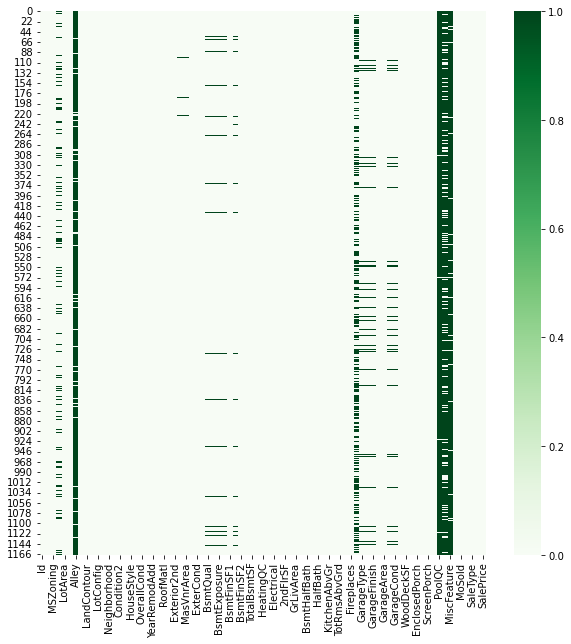

In [13]:
#checking null( values using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cmap='Greens');

In [14]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean(),4))
  #printing percentage of missing values

LotFrontage 0.1832
Alley 0.9341
MasVnrType 0.006
MasVnrArea 0.006
BsmtQual 0.0257
BsmtCond 0.0257
BsmtExposure 0.0265
BsmtFinType1 0.0257
BsmtFinType2 0.0265
FireplaceQu 0.4717
GarageType 0.0548
GarageYrBlt 0.0548
GarageFinish 0.0548
GarageQual 0.0548
GarageCond 0.0548
PoolQC 0.994
Fence 0.7971
MiscFeature 0.9623


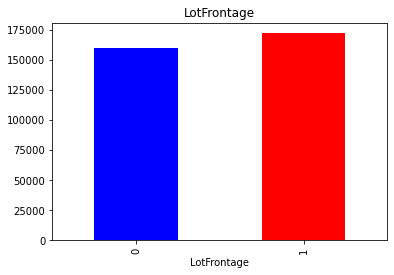

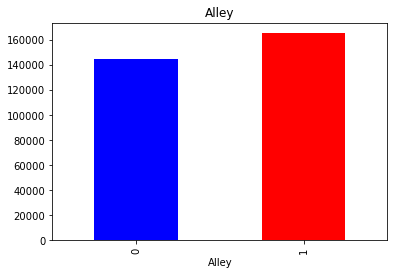

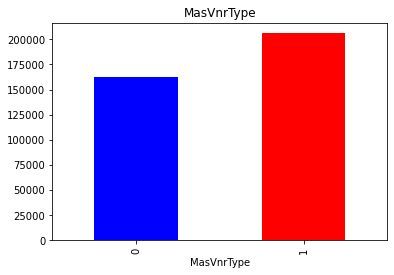

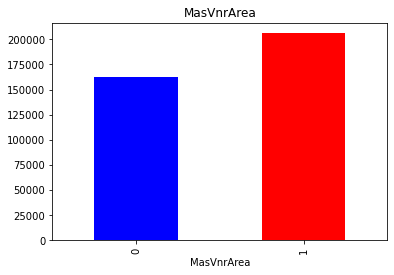

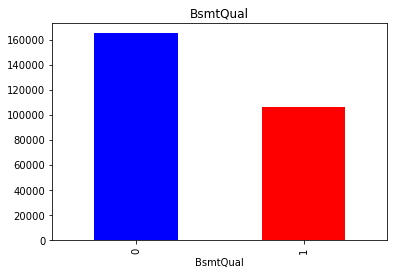

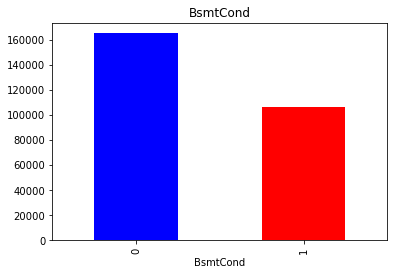

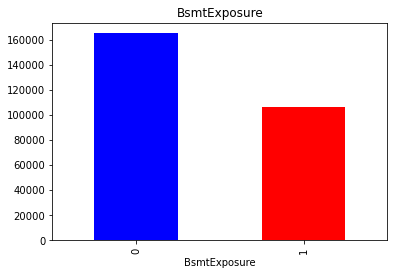

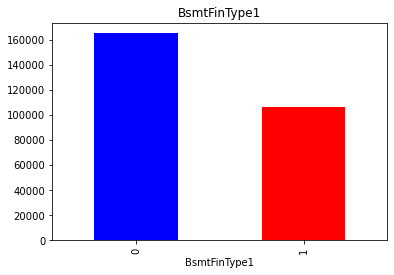

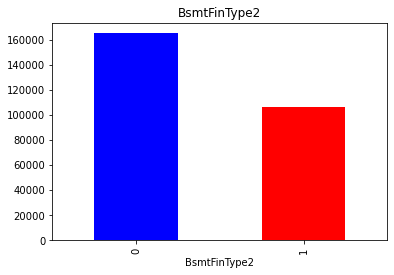

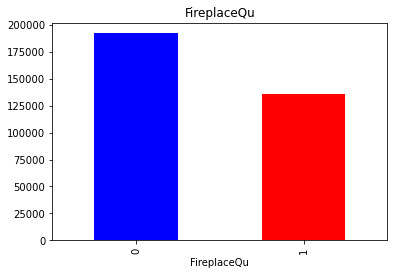

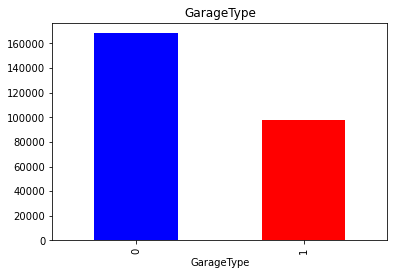

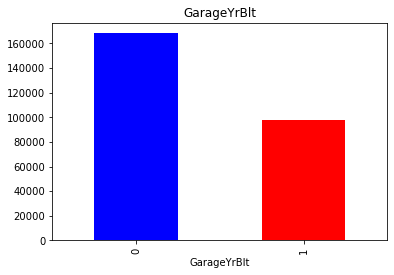

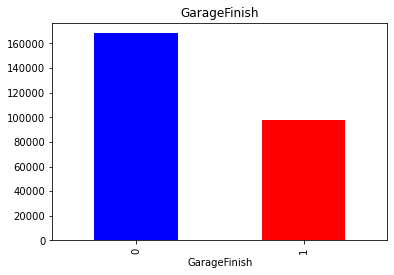

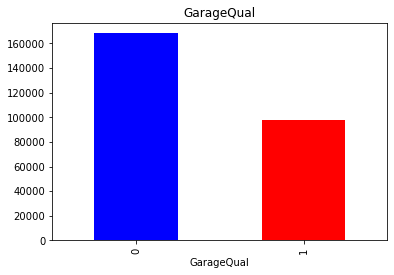

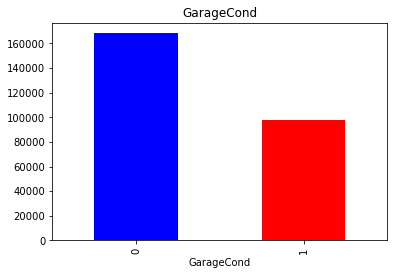

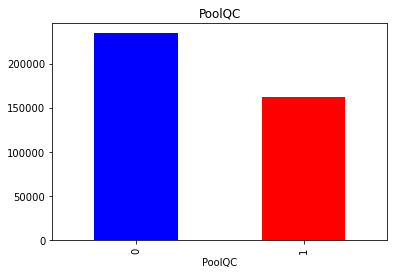

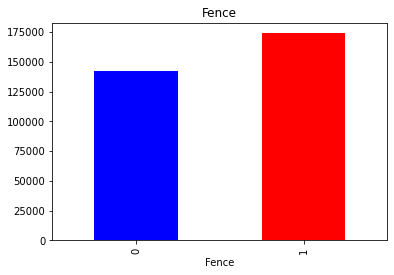

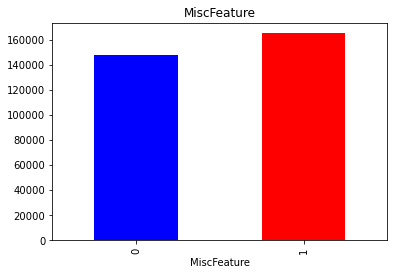

In [15]:
for feature in features_with_na:
    data= df.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['SalePrice'].median().plot.bar(color=['blue','red']) #1 for missing values and 0 for observation present
    plt.title(feature)
    plt.show()

In [16]:
#numerical features
numerical_features=[feature for feature in df.columns if df[feature].dtypes !='object']
print('Number of numerical variables:',len(numerical_features))
df[numerical_features].head()

Number of numerical variables: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,127,120,NaN,4928,6,5,1976,1976,0.0,120,...,0,205,0,0,0,0,0,2,2007,128000
1,889,20,95.0,15865,8,6,1970,1970,0.0,351,...,81,207,0,0,224,0,0,10,2007,268000
2,793,60,92.0,9920,7,5,1996,1997,0.0,862,...,180,130,0,0,0,0,0,6,2007,269790
3,110,20,105.0,11751,6,6,1977,1977,480.0,705,...,0,122,0,0,0,0,0,1,2010,190000
4,422,20,NaN,16635,6,7,1977,2000,126.0,1246,...,240,0,0,0,0,0,0,6,2009,215000


In [17]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [18]:
#temporal variables
year_feature=[feature for feature in df.columns if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [19]:
for feature in year_feature:
    print(feature,df[feature].unique())

YearBuilt [1976 1970 1996 1977 2006 1957 1965 1947 1937 2003 1960 1955 1923 1930
 2007 2001 1972 1950 1961 1953 1918 2010 1922 1934 2005 1946 1941 1948
 1975 1978 1956 2004 1982 2000 2002 1920 1992 1936 1967 1989 1929 1968
 1959 1935 1966 1931 1916 1998 1962 1974 1926 1904 1995 1969 1985 1963
 1958 1892 2008 1971 1980 1945 1986 1981 1949 1940 1954 1925 1915 1921
 1924 1999 1951 1993 1964 1900 1919 1910 1938 1880 1988 1911 1990 1979
 1927 1983 1994 2009 1928 1917 1898 1997 1984 1973 1952 1939 1987 1890
 1942 1991 1932 1908 1914 1882 1905 1875 1906 1893 1912 1913]
YearRemodAdd [1976 1970 1997 1977 2000 2006 1996 1965 1950 2003 1960 1955 2007 2001
 1961 1998 1953 2010 1995 2005 1992 1975 1978 1982 2002 1989 1967 1968
 1959 2004 1966 2008 1987 1981 1969 1985 1963 1991 1993 1971 1990 1956
 1986 1999 1954 1957 1994 1972 1958 1980 1979 1951 1983 2009 1962 1964
 1952 1984 1988 1974 1973]
GarageYrBlt [1977. 1970. 1997. 2006. 1957. 1965. 1947. 1937. 2003. 1974. 1955. 1923.
 2002. 2007. 1987. 200

Text(0.5, 1.0, 'House price vs year sold')

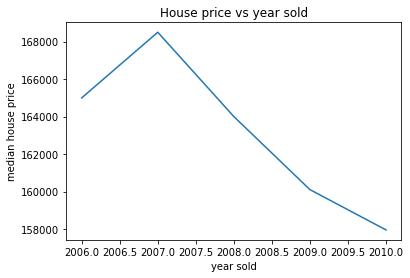

In [20]:
#to check relationship between year of house sold and sale price
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("year sold")
plt.ylabel("median house price")
plt.title("House price vs year sold")

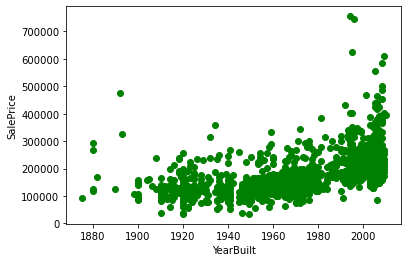

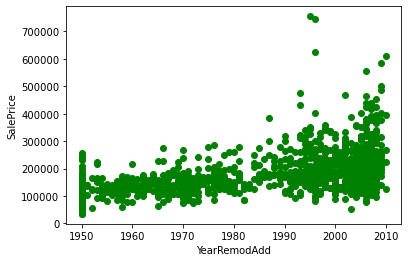

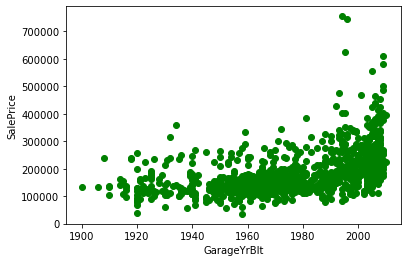

In [21]:
#difference between all year feature with sale price
for feature in year_feature:
    if feature!='YrSold':
        data=df.copy()
        plt.scatter(data[feature],data['SalePrice'],color='green')
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [22]:
#discrete features in our data
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature+['Id']]
print('discrete feature count :',len(discrete_feature))
print(discrete_feature)

discrete feature count : 17
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [23]:
df[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,120,6,5,0,0,0,2,0,2,1,5,1,2,0,0,0,2
1,20,8,6,0,1,0,2,0,4,1,8,1,2,0,0,0,10
2,60,7,5,0,1,0,2,1,3,1,8,1,2,0,0,0,6
3,20,6,6,0,0,0,2,0,3,1,7,1,2,0,0,0,1
4,20,6,7,0,0,1,2,0,3,1,8,1,2,0,0,0,6


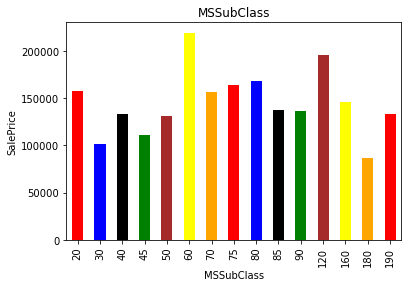

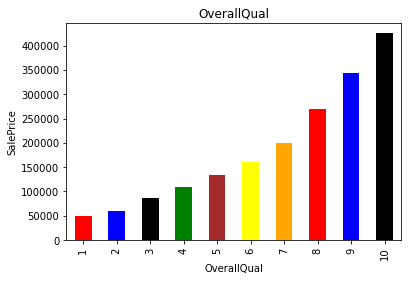

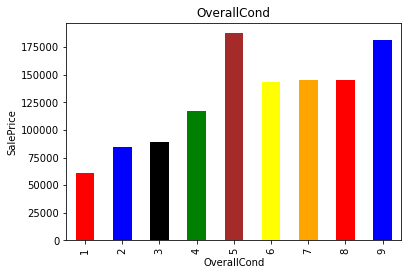

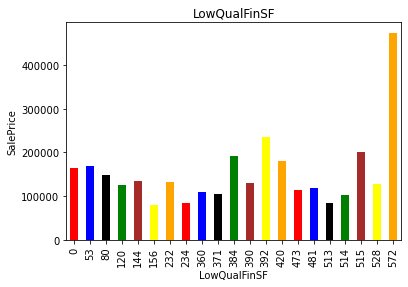

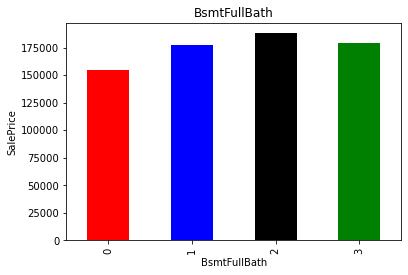

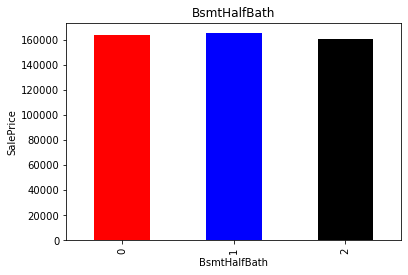

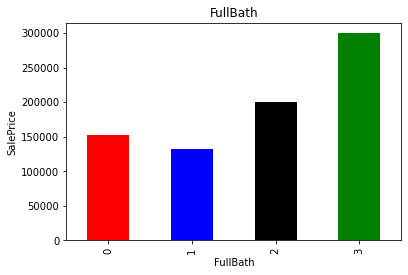

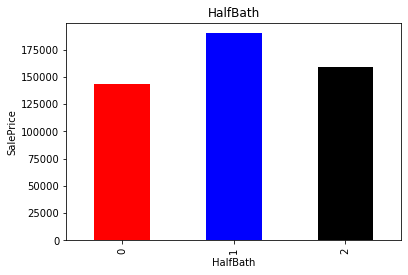

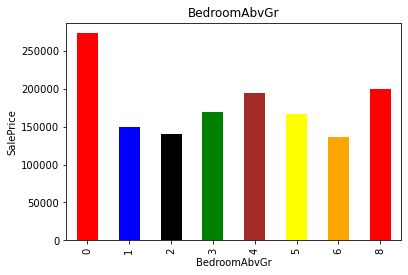

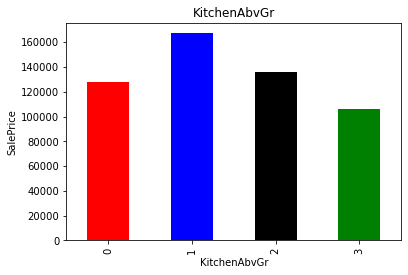

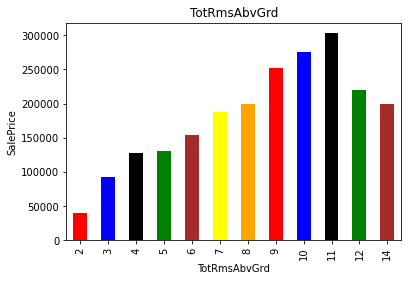

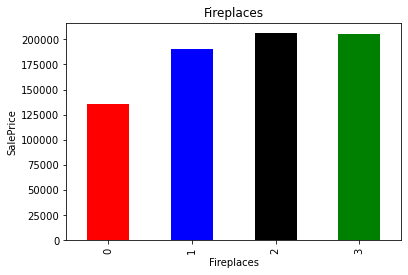

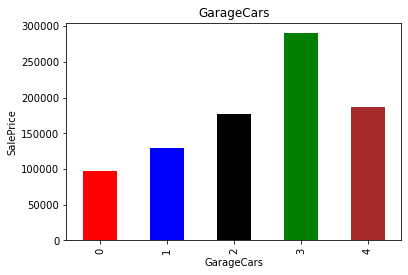

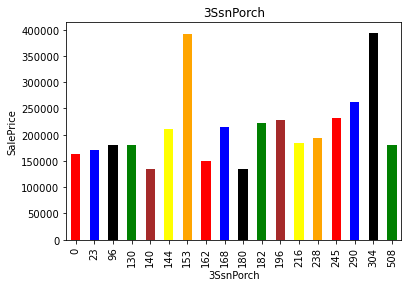

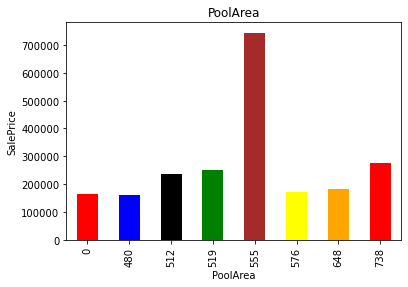

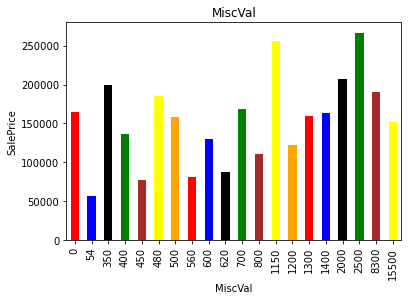

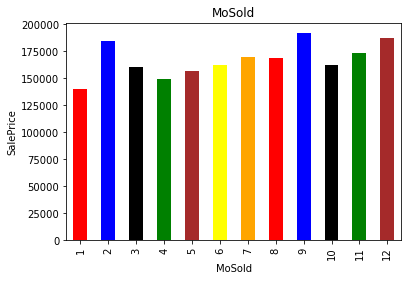

In [24]:
#relationship between discrete variable and sale price
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=['red','blue','black','green','brown','yellow','orange'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [25]:
#continuous variable 
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("continuous feature count: ",(len(continuous_feature)))
print(continuous_feature)

continuous feature count:  16
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


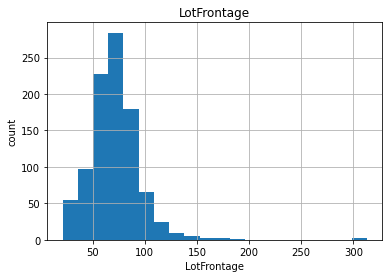

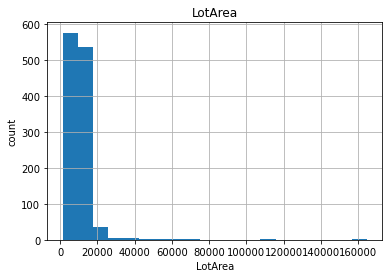

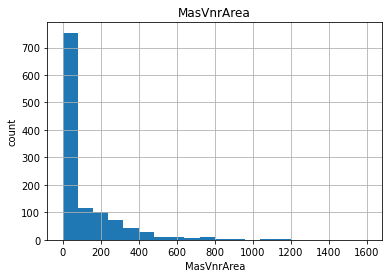

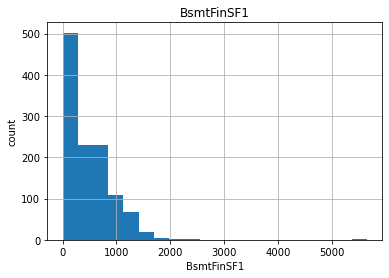

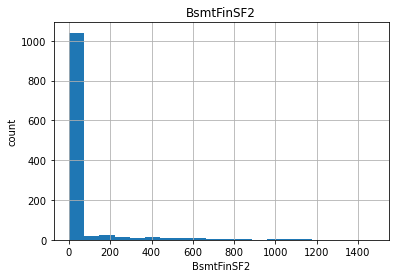

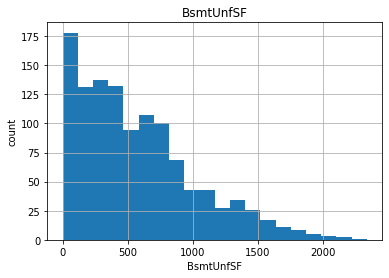

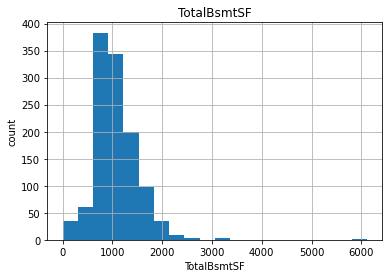

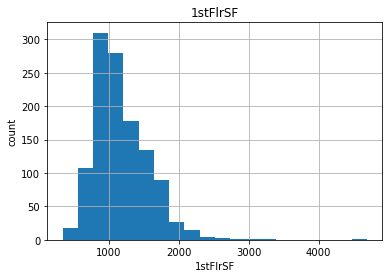

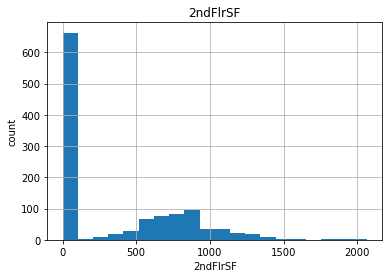

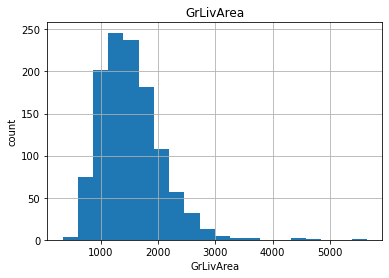

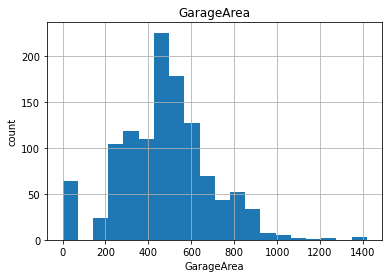

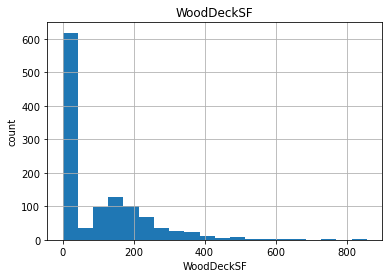

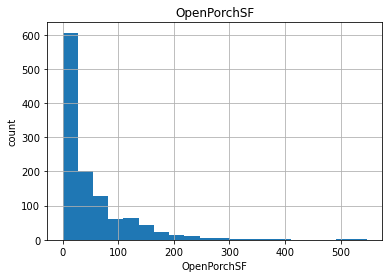

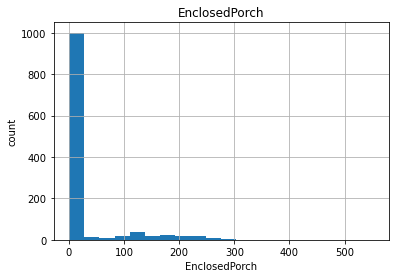

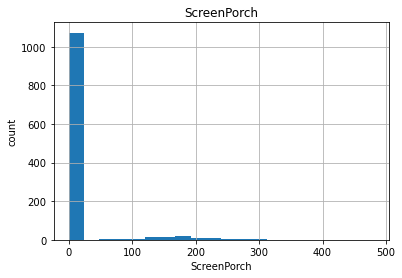

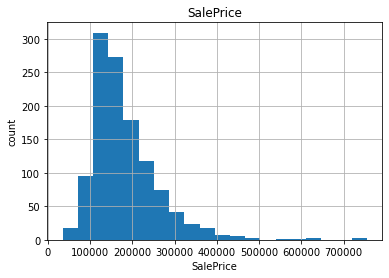

In [26]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

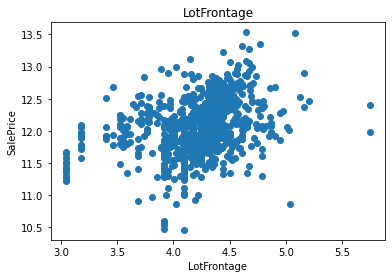

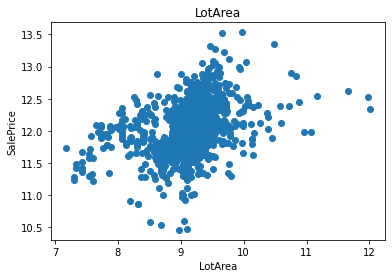

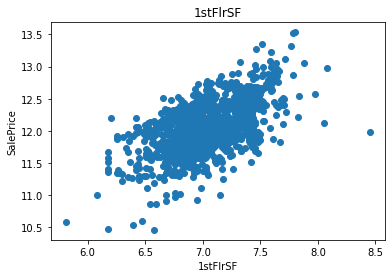

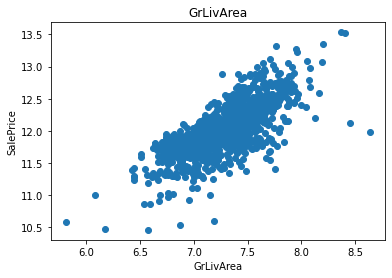

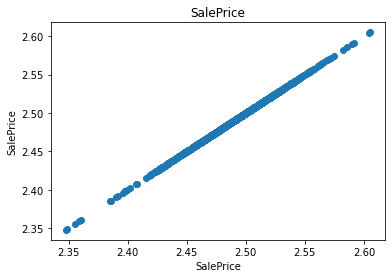

In [27]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()



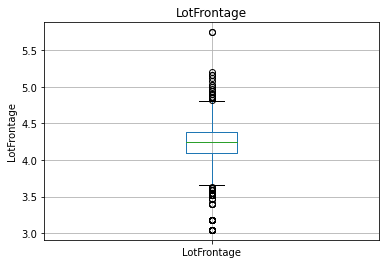

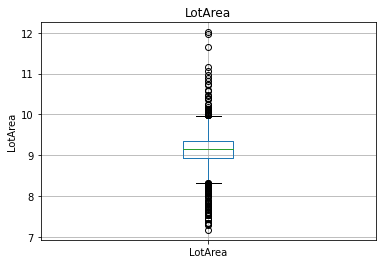

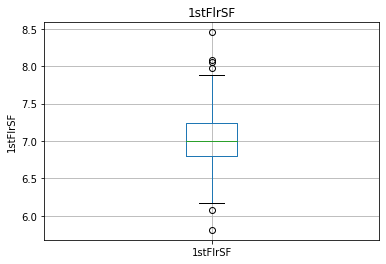

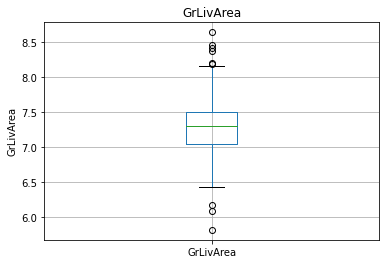

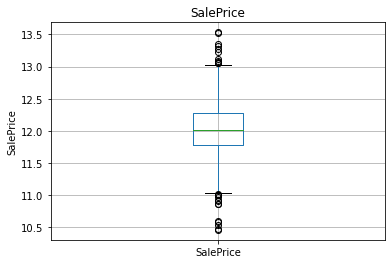

In [28]:
#outliers
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [29]:
#categorical variable
categorical_features=[feature for feature in df.columns if data[feature].dtype=='object']
print('Categorical feature :',len(categorical_features))
categorical_features

Categorical feature : 43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [30]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,RFn,TA,TA,Y,NaN,MnPrv,NaN,COD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [31]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 1
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 14
The feature is Exterior2nd and number of categories are 15
The feature is MasVnrType and number of cate

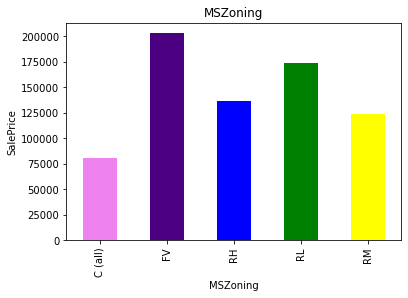

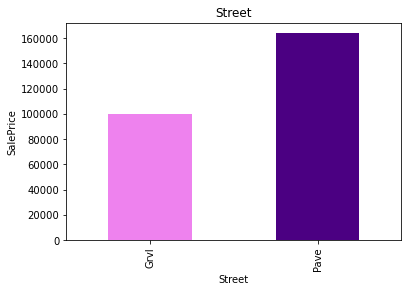

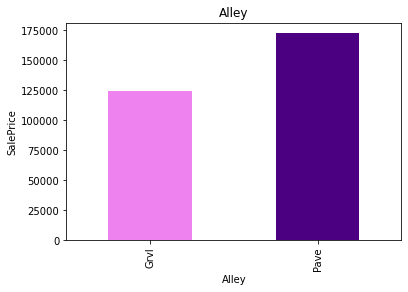

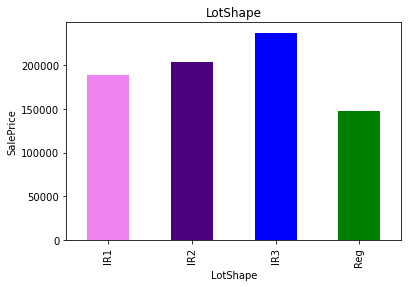

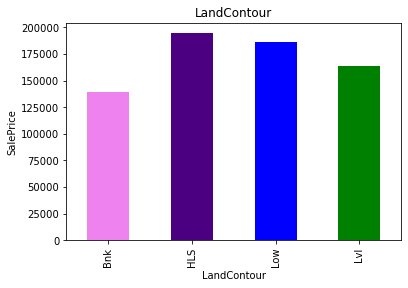

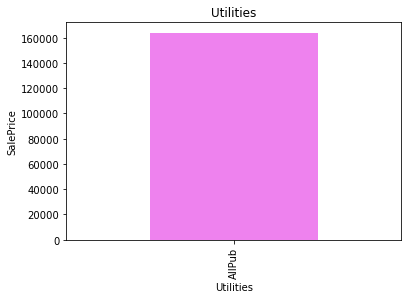

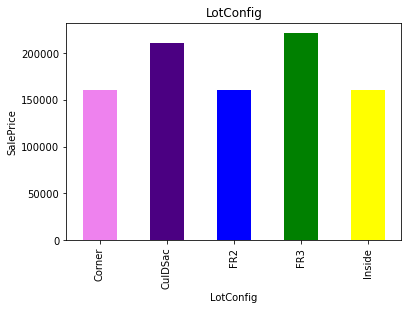

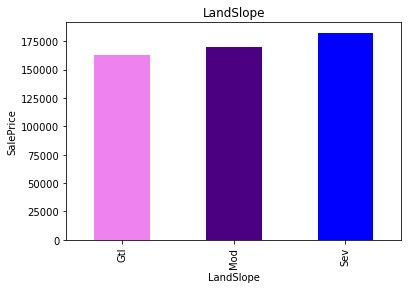

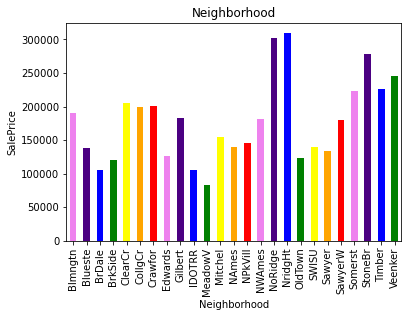

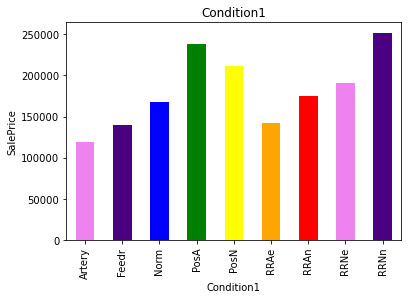

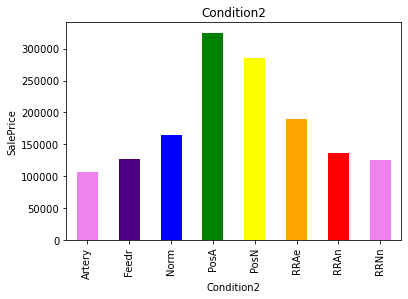

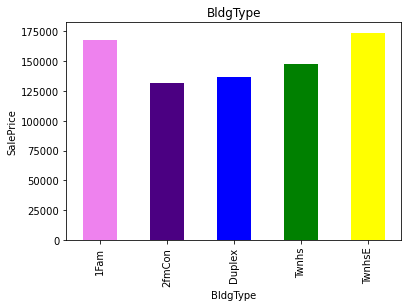

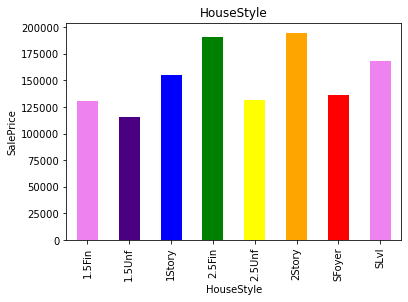

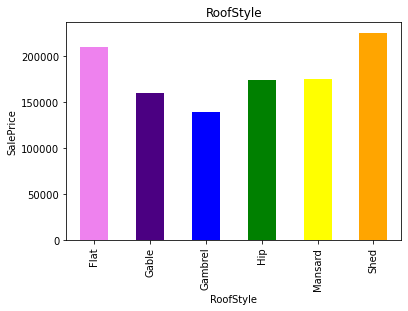

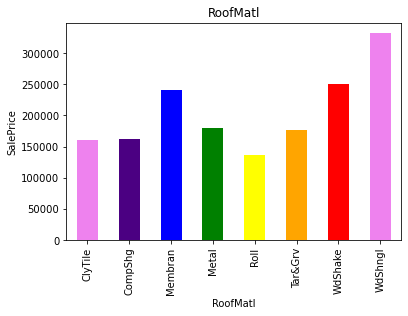

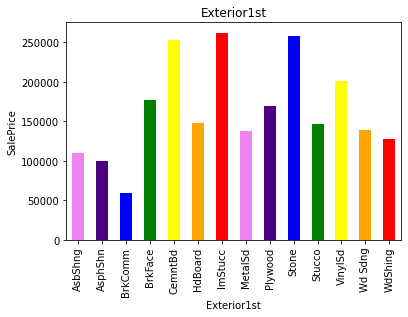

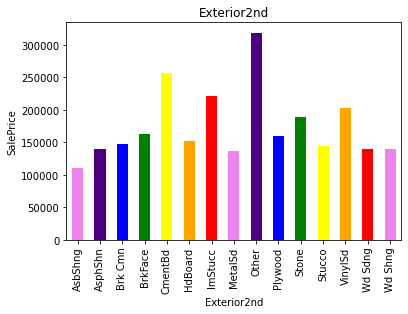

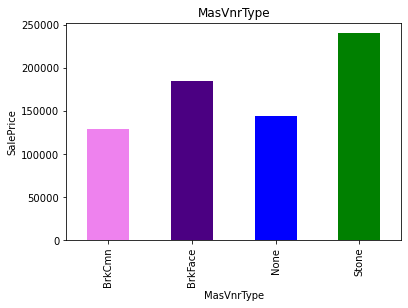

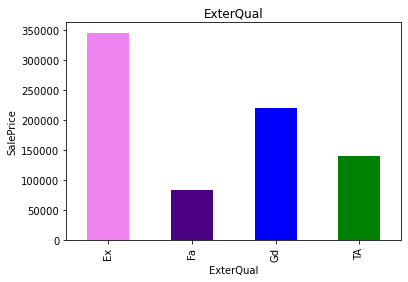

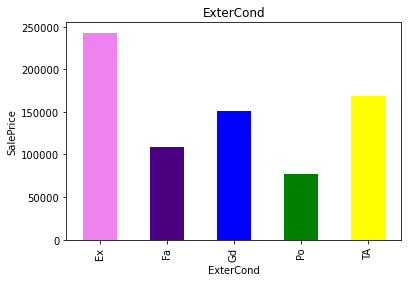

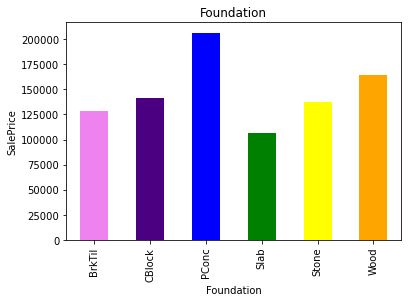

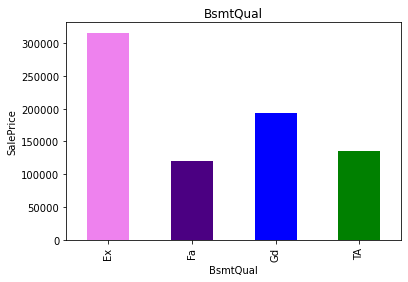

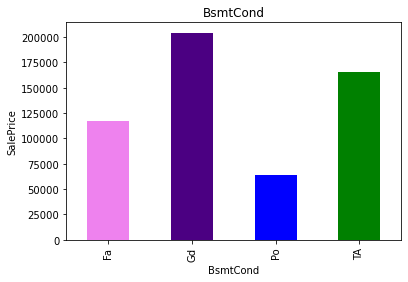

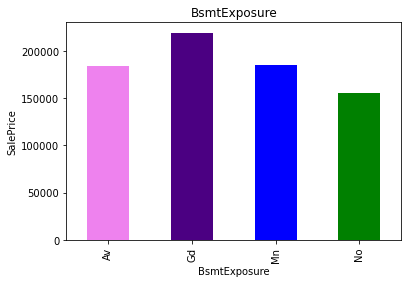

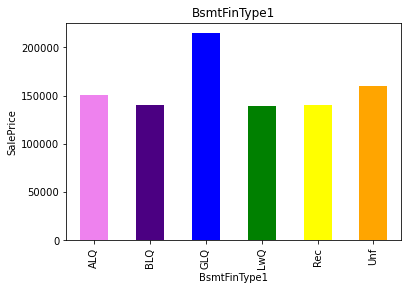

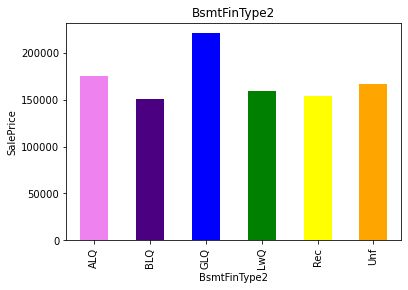

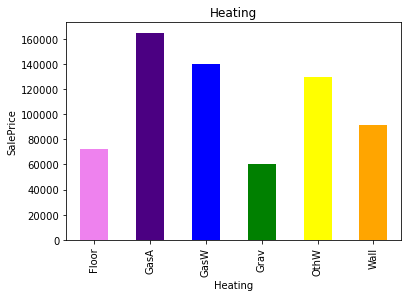

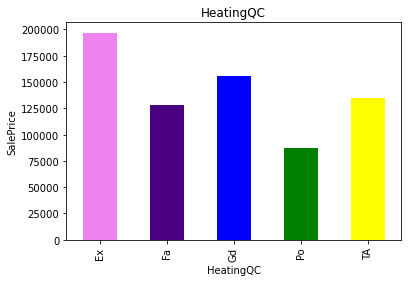

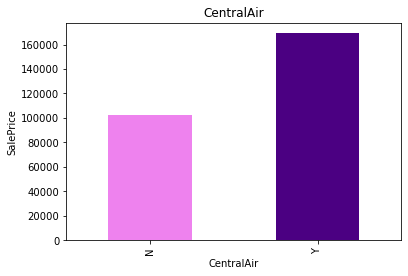

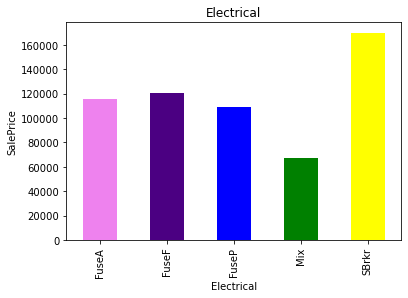

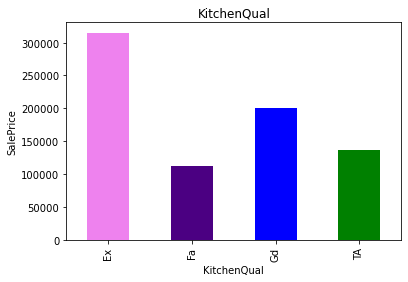

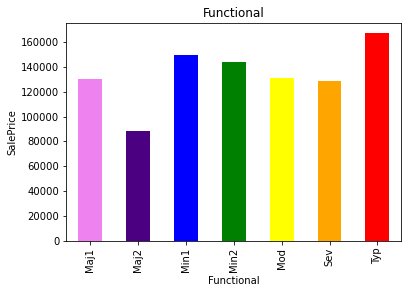

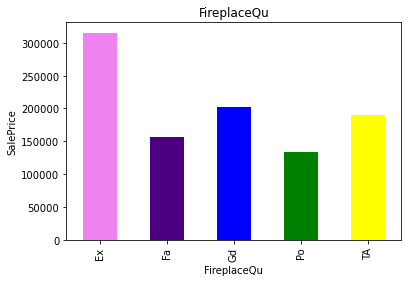

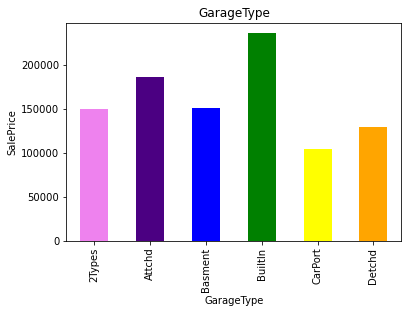

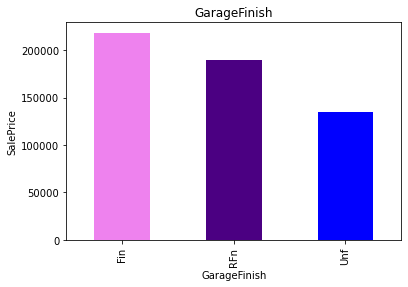

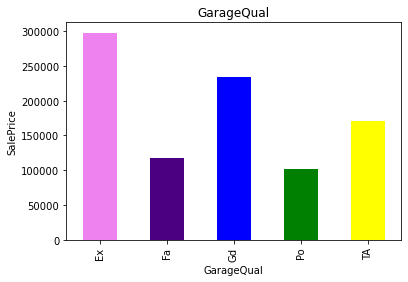

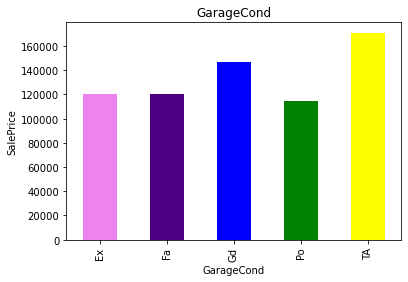

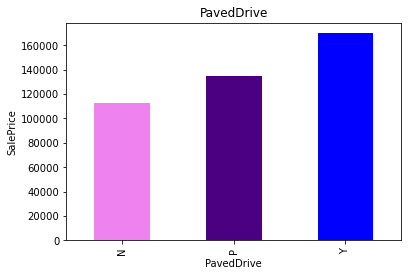

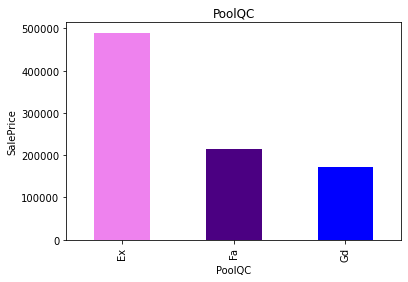

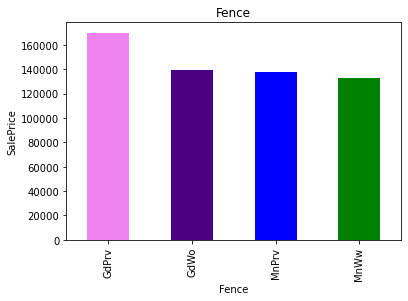

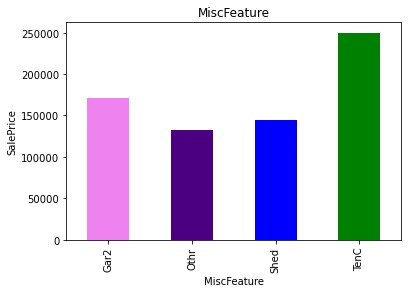

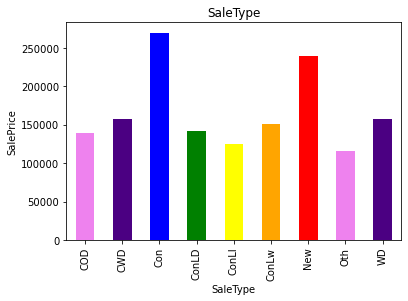

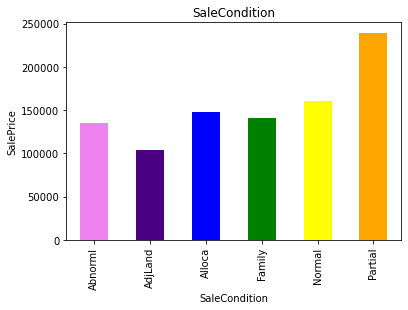

In [32]:
#relationship between categorical variable and dependent feature SalePrice
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar(color=['violet','indigo','blue','green','yellow','orange','red'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

# Apply Label Encoder

In [33]:
df1=df.copy()
X=df1.drop('SalePrice',axis=1)

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
X=X.apply(LabelEncoder().fit_transform)

In [36]:
df1=X
df1['SalePrice']=df['SalePrice']

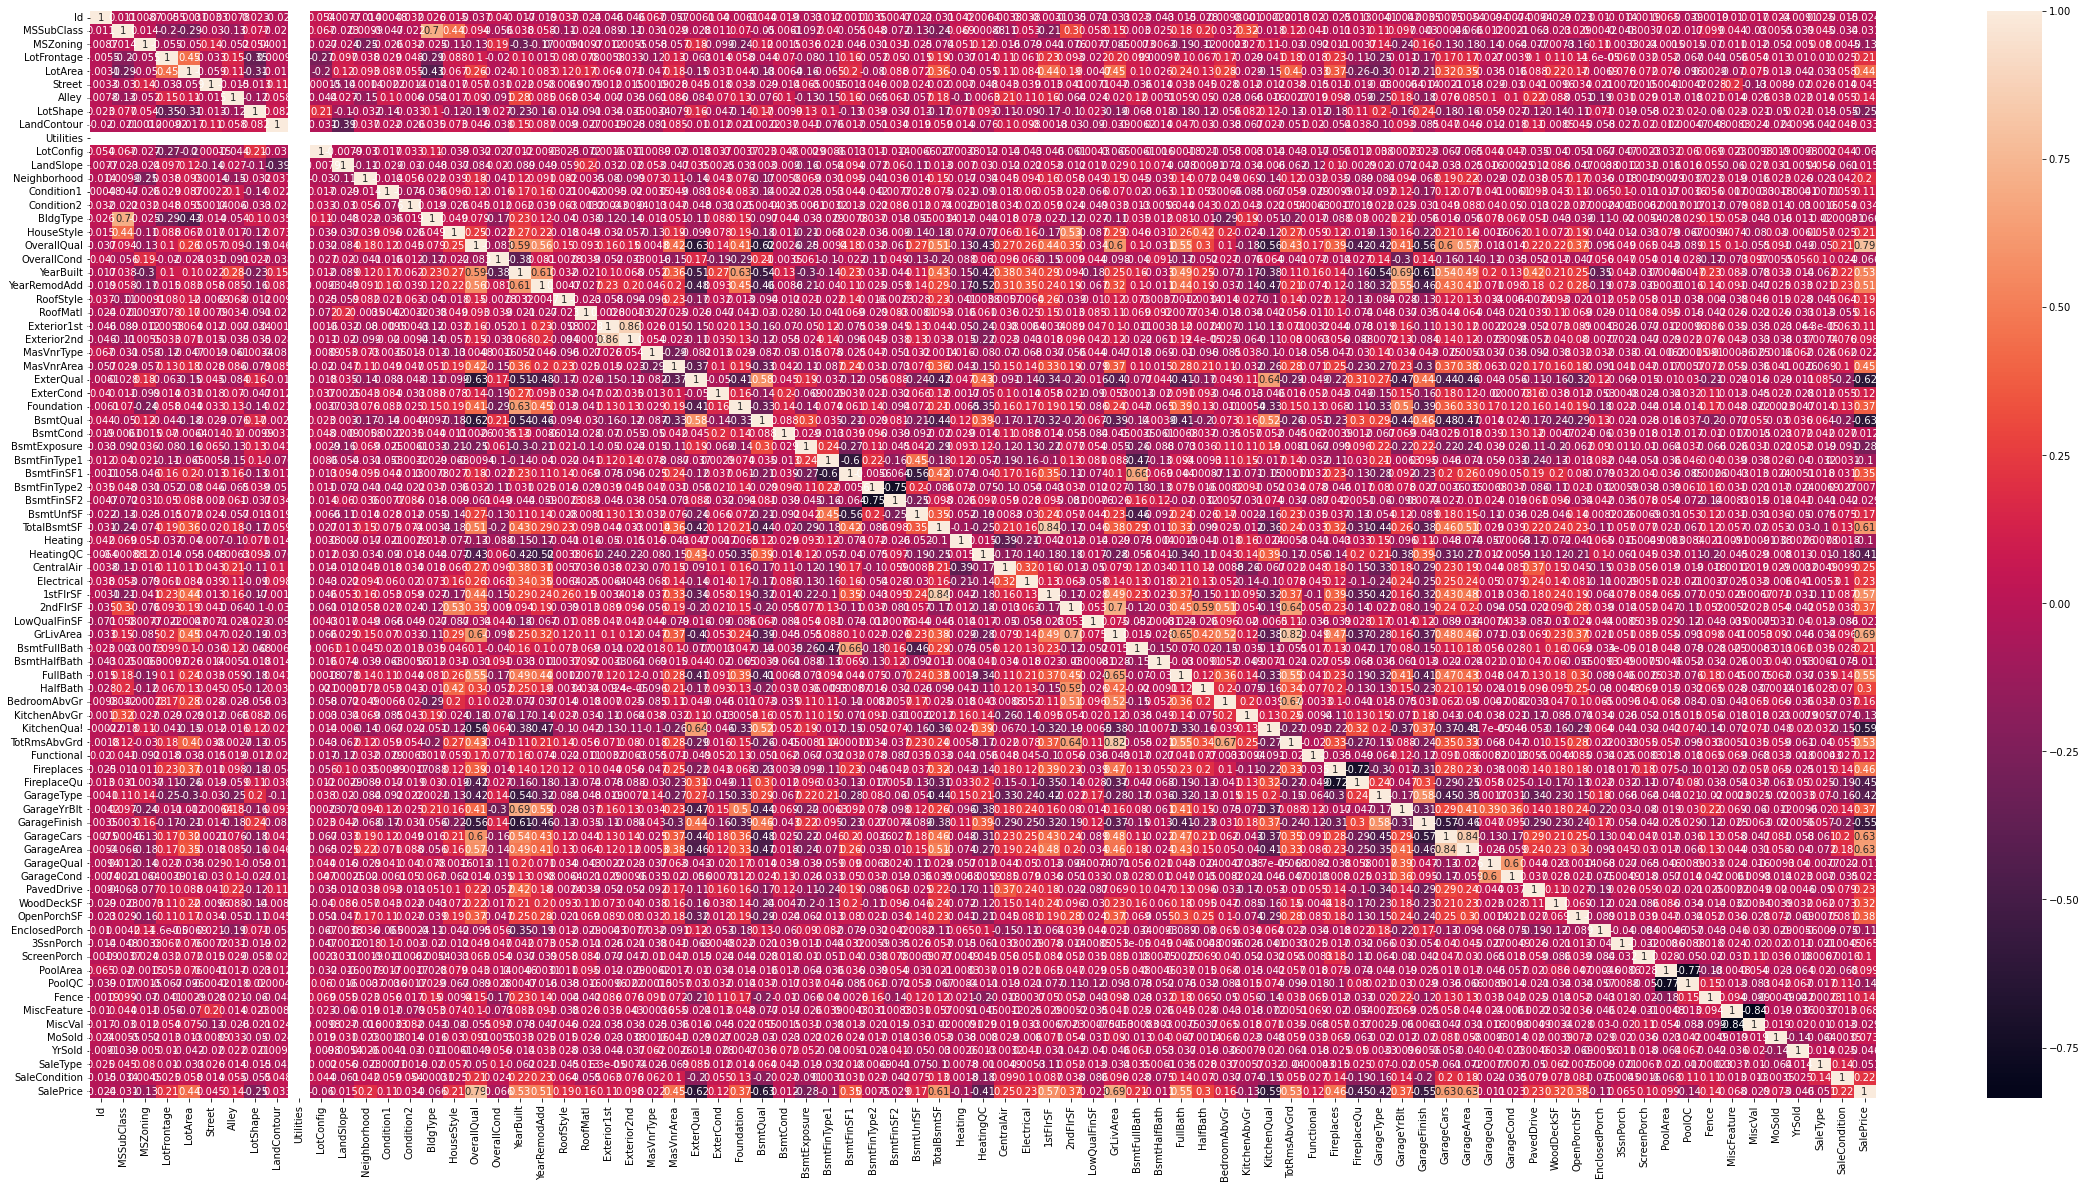

In [37]:
#checking correlation using heatmap
plt.figure(figsize=(40,20))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [38]:
#checking correlation
df1.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.010555,0.008739,-0.005485,-0.003123,0.003303,0.007752,0.022605,-0.020308,NaN,...,0.065065,-0.038975,-0.001886,0.010466,0.016537,0.024028,-0.009118,0.024640,-0.015146,-0.024068
MSSubClass,0.010555,1.000000,0.013516,-0.198807,-0.289010,-0.029520,-0.127555,0.076645,-0.021033,NaN,...,0.019977,-0.016902,0.098981,0.043716,-0.030254,0.005488,-0.039245,0.045454,-0.033527,-0.031126
MSZoning,0.008739,0.013516,1.000000,-0.054532,-0.050498,0.140215,-0.051864,0.053655,0.001175,NaN,...,-0.001502,0.001533,-0.070105,0.010802,0.011956,-0.051646,-0.004964,0.079854,0.004501,-0.133221
LotFrontage,-0.005485,-0.198807,-0.054532,1.000000,0.447861,-0.032792,0.153235,-0.350736,0.000924,NaN,...,0.051868,-0.066531,-0.040795,-0.056298,0.054216,0.012984,0.010405,0.010230,0.025358,0.206279
LotArea,-0.003123,-0.289010,-0.050498,0.447861,1.000000,-0.059142,0.114625,-0.305133,-0.017495,NaN,...,0.076404,-0.096210,0.002875,-0.070152,0.075370,0.012867,-0.041749,-0.033343,0.057748,0.440001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.024028,0.005488,-0.051646,0.012984,0.012867,-0.008860,0.033064,-0.050418,-0.023872,NaN,...,-0.022744,0.041533,-0.004882,-0.019002,0.018699,1.000000,-0.144536,-0.063667,-0.003462,0.072764
YrSold,-0.009118,-0.039245,-0.004964,0.010405,-0.041749,-0.019635,0.022418,0.021421,0.009499,NaN,...,-0.064406,0.067465,-0.041525,-0.036217,0.020136,-0.144536,1.000000,0.013606,0.024505,-0.045508
SaleType,0.024640,0.045454,0.079854,0.010230,-0.033343,0.025920,0.014444,-0.015161,-0.041763,NaN,...,0.019845,-0.016640,-0.000235,0.003691,0.010380,-0.063667,0.013606,1.000000,0.143557,-0.050851
SaleCondition,-0.015146,-0.033527,0.004501,0.025358,0.057748,0.014176,0.055123,-0.054905,0.047715,NaN,...,-0.068069,0.107767,0.107588,0.012698,0.012981,-0.003462,0.024505,0.143557,1.000000,0.217687


In [39]:
#check target variable correlation with other variables
df_target=df1.corr()
df_target['SalePrice'].sort_values(ascending=False)   #Target variable correlation

SalePrice       1.000000
OverallQual     0.789185
GrLivArea       0.686097
GarageArea      0.634464
GarageCars      0.628329
                  ...   
GarageFinish   -0.550624
KitchenQual    -0.592468
ExterQual      -0.624820
BsmtQual       -0.628798
Utilities            NaN
Name: SalePrice, Length: 81, dtype: float64

In [40]:
#describe the data
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,583.500000,337.316864,0.0,291.75,583.5,875.25,1167.0
MSSubClass,1168.0,4.166096,4.139986,0.0,0.00,4.0,6.00,14.0
MSZoning,1168.0,3.013699,0.633120,0.0,3.00,3.0,3.00,4.0
LotFrontage,1168.0,52.454623,31.378301,0.0,30.00,45.0,70.00,106.0
LotArea,1168.0,414.643836,249.993254,0.0,197.75,407.5,618.25,891.0
...,...,...,...,...,...,...,...,...
MoSold,1168.0,5.344178,2.686352,0.0,4.00,5.0,7.00,11.0
YrSold,1168.0,1.804795,1.329738,0.0,1.00,2.0,3.00,4.0
SaleType,1168.0,7.465753,1.619459,0.0,8.00,8.0,8.00,8.0
SaleCondition,1168.0,3.768836,1.112208,0.0,4.00,4.0,4.00,5.0


In [41]:
#handling the categorical features which are missing
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='object']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

Alley: 0.9341% missing values
MasVnrType: 0.006% missing values
BsmtQual: 0.0257% missing values
BsmtCond: 0.0257% missing values
BsmtExposure: 0.0265% missing values
BsmtFinType1: 0.0257% missing values
BsmtFinType2: 0.0265% missing values
FireplaceQu: 0.4717% missing values
GarageType: 0.0548% missing values
GarageFinish: 0.0548% missing values
GarageQual: 0.0548% missing values
GarageCond: 0.0548% missing values
PoolQC: 0.994% missing values
Fence: 0.7971% missing values
MiscFeature: 0.9623% missing values


In [42]:
# Replace missing value with a new label
def replace_cat_feature(df,features_nan):
    data=df.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

In [43]:
df=replace_cat_feature(df,features_nan)
df[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [44]:
# Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='object']

# We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.round(df[feature].isnull().mean(),4)))

LotFrontage: 0.1832% missing value
MasVnrArea: 0.006% missing value
GarageYrBlt: 0.0548% missing value


In [45]:
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    
    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [46]:
df.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
                 ..
SaleCondition     0
SalePrice         0
LotFrontagenan    0
MasVnrAreanan     0
GarageYrBltnan    0
Length: 84, dtype: int64

In [47]:
#drop the Utilities variable
df.drop('Utilities',axis=1,inplace=True) #have only one unique value

# Apply Label Encoder

In [48]:
x=df.drop('SalePrice',axis=1)
x=x.apply(LabelEncoder().fit_transform)
df1=x
df1['SalePrice']=df['SalePrice']
df=df1

In [49]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan,SalePrice
0,94,11,3,40,80,1,1,0,3,4,...,1,0,1,1,8,4,1,0,0,128000
1,720,0,3,65,808,1,1,0,3,4,...,1,0,9,1,8,4,0,0,0,268000
2,642,5,3,62,449,1,1,0,3,1,...,1,0,5,1,8,4,0,0,0,269790
3,79,0,3,75,632,1,1,0,3,4,...,1,0,0,4,0,4,0,0,0,190000
4,341,0,3,40,821,1,1,0,3,2,...,1,0,5,3,8,4,1,0,0,215000


# Checking Skewness

In [50]:
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']
x.skew().sort_values(ascending=False)

PoolArea         16.104199
MasVnrAreanan    12.817372
Condition2       11.514458
Heating          10.103609
LowQualFinSF      9.415784
                   ...    
GarageCond       -3.573044
SaleType         -3.660513
Functional       -3.999663
PoolQC          -15.903184
Street          -17.021969
Length: 82, dtype: float64

In [51]:
#removing skewness
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

In [52]:
scaler=MinMaxScaler(feature_range=(1,2))
power=PowerTransformer()
pipe=Pipeline(steps=[('p',power),('s',scaler)])

In [53]:
data=pipe.fit_transform(x)

In [54]:
x=pd.DataFrame(data,columns=x.columns)

In [55]:
# drop Id Variable bcz all houses as unique id
x.drop('Id',axis=1,inplace=True)

In [56]:
#some variables are highly negative correlation with target variables so drop that variables
x.drop('HeatingQC',axis=1,inplace=True)
x.drop('GarageType',axis=1,inplace=True)
x.drop('GarageFinish',axis=1,inplace=True)
x.drop('KitchenQual',axis=1,inplace=True)
x.drop('BsmtQual',axis=1,inplace=True)

In [57]:
#shape of x after drop some variable
x.shape

(1168, 76)

In [58]:
#shape the target variable
y.shape

(1168,)

# Model Selection

In [59]:
#importing models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor


In [60]:
#model selection
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score

#metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [61]:
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()

In [62]:
models_list=[lr,lasso,ridge,dtr,knr,rfr,gbr,abr]

# LinearRegression

In [63]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr.fit(x_train,y_train)
    score=lr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('maxscore:',maxscore,'maxrn:',maxrn)

maxscore: 0.8580826069420311 maxrn: 77


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=77)
lr.fit(x_train,y_train)
score=lr.score(x_train,y_train)
pred=lr.predict(x_test)
print('Score:',score)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

Score: 0.8580826069420311
mean_absolute_error: 29277.8547008547
mean_squared_error: 2912371248.6666665
r2_score: 0.48535519759701873


# Lasso Regressor

In [65]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lasso.fit(x_train,y_train)
    score=lasso.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('maxscore:',maxscore,'maxrn:',maxrn)

maxscore: 0.8580805424423578 maxrn: 77


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=77)
lasso.fit(x_train,y_train)
score=lasso.score(x_train,y_train)
pred=lasso.predict(x_test)
print('Score:',score)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

Score: 0.8580805424423578
mean_absolute_error: 29240.758859430654
mean_squared_error: 2907369757.886775
r2_score: 0.48539432890873013


# Ridge Regressor

In [67]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    ridge.fit(x_train,y_train)
    score=ridge.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('maxscore:',maxscore,'maxrn:',maxrn)

maxscore: 0.8548134130367736 maxrn: 77


In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=77)
ridge.fit(x_train,y_train)
score=ridge.score(x_train,y_train)
pred=ridge.predict(x_test)
print('Score:',score)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

Score: 0.8548134130367736
mean_absolute_error: 27856.35527261117
mean_squared_error: 2841261458.3066063
r2_score: 0.4723279167880039


# DecisionTreeRegressor

In [69]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    dtr.fit(x_train,y_train)
    score=dtr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('maxscore:',maxscore,'maxrn:',maxrn)

maxscore: 1.0 maxrn: 1


In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=1)
dtr.fit(x_train,y_train)
score=dtr.score(x_train,y_train)
pred=dtr.predict(x_test)
print('Score:',score)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

Score: 1.0
mean_absolute_error: 25386.188034188035
mean_squared_error: 1656204276.6324787
r2_score: 0.7535280116826251


# KNeighborsRegressor

In [71]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    knr.fit(x_train,y_train)
    score=knr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('maxscore:',maxscore,'maxrn:',maxrn)

maxscore: 0.8198694866209895 maxrn: 20


In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=20)
knr.fit(x_train,y_train)
score=knr.score(x_train,y_train)
pred=knr.predict(x_test)
print('Score:',score)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

Score: 0.8198694866209895
mean_absolute_error: 30649.32905982906
mean_squared_error: 3826185602.27265
r2_score: -0.07482254316678771


# RandomForestRegressor

In [73]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    rfr.fit(x_train,y_train)
    score=rfr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('maxscore:',maxscore,'maxrn:',maxrn)

maxscore: 0.9838240933772254 maxrn: 16


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=16)
rfr.fit(x_train,y_train)
score=rfr.score(x_train,y_train)
pred=rfr.predict(x_test)
print('Score:',score)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

Score: 0.9826318720478744
mean_absolute_error: 23075.415085470086
mean_squared_error: 2747879851.319312
r2_score: 0.6026910531639353


# GradientBoostingRegressor

In [75]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    gbr.fit(x_train,y_train)
    score=gbr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('maxscore:',maxscore,'maxrn:',maxrn)

maxscore: 0.974906681223331 maxrn: 92


In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=92)
gbr.fit(x_train,y_train)
score=gbr.score(x_train,y_train)
pred=gbr.predict(x_test)
print('Score:',score)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

Score: 0.974906681223331
mean_absolute_error: 17813.62779109203
mean_squared_error: 729282165.4185619
r2_score: 0.8590701583291814


# AdaBoostRegressor

In [77]:
maxscore=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    abr.fit(x_train,y_train)
    score=abr.score(x_train,y_train)
    if score>maxscore:
        maxscore=score
        maxrn=i
print('maxscore:',maxscore,'maxrn:',maxrn)

maxscore: 0.8944564607344911 maxrn: 27


In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=27)
gbr.fit(x_train,y_train)
score=gbr.score(x_train,y_train)
pred=gbr.predict(x_test)
print('Score:',score)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

Score: 0.974529678078367
mean_absolute_error: 17946.454582699756
mean_squared_error: 1045737878.3035692
r2_score: 0.7999707651340222


# Cross Validation

In [79]:
for model in models_list:
    score=cross_val_score(model,x,y,cv=5)
    print(model)
    print(score)
    print(score.mean())
    print('\n')

LinearRegression()
[0.77496901 0.75838527 0.69255325 0.82293188 0.79627198]
0.7690222780984313


Lasso()
[0.77512185 0.75880422 0.69241124 0.82301799 0.7972555 ]
0.7693221606283863


Ridge()
[0.76517719 0.76631316 0.69358397 0.82710435 0.83390548]
0.7772168296981572


DecisionTreeRegressor()
[0.63431149 0.62849921 0.71464235 0.76390059 0.64872462]
0.6780156509640841


KNeighborsRegressor()
[0.67490992 0.72107719 0.65612121 0.71303389 0.69780227]
0.6925888956311337


RandomForestRegressor()
[0.87797717 0.76286535 0.82223253 0.89090399 0.84229909]
0.839255625438755


GradientBoostingRegressor()
[0.87580737 0.76767665 0.89701353 0.90464471 0.87019745]
0.8630679406540669


AdaBoostRegressor()
[0.84881738 0.79456499 0.80034445 0.83363787 0.75668686]
0.806810308085059




# Conclusion: GradientBoostingRegressor is the best model

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=92)
gbr.fit(x_train,y_train)
score=gbr.score(x_train,y_train)
pred=gbr.predict(x_test)
print('Score:',score)
print('mean_absolute_error:',mean_absolute_error(pred,y_test))
print('mean_squared_error:',mean_squared_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

Score: 0.974906681223331
mean_absolute_error: 17937.373653752897
mean_squared_error: 739927366.016254
r2_score: 0.8576798814337354


# Hyperparameter Tuning

In [81]:
parameters={'loss':['squared_error','absolute_error','huber','quantile'],'n_estimators':[50,70,100]}

In [82]:
gbr_grid = GridSearchCV(gbr,param_grid=parameters, cv=5)
gbr_grid.fit(x_train,y_train)
print('Best score:', gbr_grid.best_score_)
print('Best score:', gbr_grid.best_params_)
print('Best score:', gbr_grid.best_estimator_)

Best score: 0.8606972680700494
Best score: {'loss': 'squared_error', 'n_estimators': 100}
Best score: GradientBoostingRegressor()


# Save the model

In [83]:
import pickle
filename='Housing Project.pkl'
pickle.dump(gbr_grid,open(filename,'wb'))

In [84]:
loaded_model=pickle.load(open('Housing Project.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

87.75732842302985
